### Deliverable 3: Preprocessing the Data for a Neural Network

In [1]:
#tf.__version__

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [4]:
# Drop the non-beneficial ID columns, 'EIN'
application_df.drop(["EIN", "SPECIAL_CONSIDERATIONS"],  axis=1, inplace=True)                       
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1


In [5]:
# Determine the number of unique values in each column
application_df.nunique()

NAME                19568
APPLICATION_TYPE       17
AFFILIATION             6
CLASSIFICATION         71
USE_CASE                5
ORGANIZATION            4
STATUS                  2
INCOME_AMT              9
ASK_AMT              8747
IS_SUCCESSFUL           2
dtype: int64

In [6]:
# Look at NAME value counts for binning
n_counts = application_df.NAME.value_counts()
n_counts[n_counts>5]

PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC     408
                                                   ... 
OLD OAK CLIFF CONSERVATION LEAGUE INC                 6
AMERICAN NEPHROLOGY NURSES ASSOCIATION                6
HUMBLE ISD EDUCATIONAL SUPPORT GROUPS INC             6
PROFESSIONAL LOADMASTER ASSOCIATION                   6
CBMC INC                                              6
Name: NAME, Length: 354, dtype: int64

<AxesSubplot:ylabel='Density'>

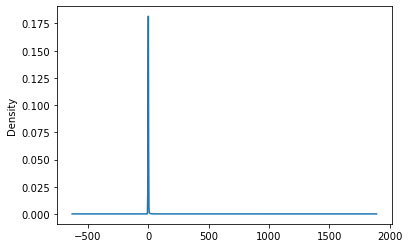

In [7]:
# Visualize the value counts of NAME.plot.density()
n_counts.plot.density()

In [8]:
# Determine which values to replace
replace_application = list(n_counts[n_counts <= 5].index)

# Replace in dataframe
for app in replace_application:
    application_df.NAME = application_df.NAME.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                           20043
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
WASHINGTON STATE UNIVERSITY                       492
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: NAME, Length: 355, dtype: int64

In [9]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Determine which values to replace if counts are less than ..?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [12]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Split our preprocessed data into our features & ta
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [17]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
### Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               39700     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 43,051
Trainable params: 43,051
Non-trainable params: 0
_________________________________________________________________


2022-08-23 12:43:30.623912: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-23 12:43:30.624504: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [20]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train, epochs=5, callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/5
  832/25724 [..............................] - ETA: 21s - loss: 0.7083 - accuracy: 0.4688
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1856/25724 [=>............................] - ETA: 12s - loss: 0.6786 - accuracy: 0.6078
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2912/25724 [==>...........................] - ETA: 9s - loss: 0.6505 - accuracy: 0.6549 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4064/25724 [===>..........................] - ETA: 8s - loss: 0.6246 - accuracy: 0.6828
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4896/25724 [====>.........................] - ETA: 7s - loss: 0.6076 - accuracy: 0.6993
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5888/25724 [=====>........................] - ETA: 6s - loss: 0.5901 - accuracy: 0.7157
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7072/25724 [=======>......................] - ETA: 5s - loss: 0.5750 - accuracy: 0.7267

 4480/25724 [====>.........................] - ETA: 3s - loss: 0.4377 - accuracy: 0.7913
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5632/25724 [=====>........................] - ETA: 3s - loss: 0.4416 - accuracy: 0.7905
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6656/25724 [======>.......................] - ETA: 2s - loss: 0.4406 - accuracy: 0.7909
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7648/25724 [=======>......................] - ETA: 2s - loss: 0.4379 - accuracy: 0.7928
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8736/25724 [=========>....................] - ETA: 2s - loss: 0.4384 - accuracy: 0.7936
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9824/25724 [==========>...................] - ETA: 2s - loss: 0.4425 - accuracy: 0.7898
Epoch 00003: saving model to checkpoints/weights.03.hdf5
10752/25724 [===========>..................] - ETA: 2s - loss: 0.4410 - accuracy: 0.7916
Epoch 00003: saving model to checkp

 9472/25724 [==========>...................] - ETA: 2s - loss: 0.4245 - accuracy: 0.8042
Epoch 00005: saving model to checkpoints/weights.05.hdf5
10496/25724 [===========>..................] - ETA: 2s - loss: 0.4259 - accuracy: 0.8030
Epoch 00005: saving model to checkpoints/weights.05.hdf5
11456/25724 [============>.................] - ETA: 2s - loss: 0.4254 - accuracy: 0.8025
Epoch 00005: saving model to checkpoints/weights.05.hdf5
12512/25724 [=============>................] - ETA: 2s - loss: 0.4271 - accuracy: 0.8005
Epoch 00005: saving model to checkpoints/weights.05.hdf5
13536/25724 [==============>...............] - ETA: 1s - loss: 0.4269 - accuracy: 0.7992
Epoch 00005: saving model to checkpoints/weights.05.hdf5
14560/25724 [===============>..............] - ETA: 1s - loss: 0.4249 - accuracy: 0.8005
Epoch 00005: saving model to checkpoints/weights.05.hdf5
15552/25724 [=================>............] - ETA: 1s - loss: 0.4257 - accuracy: 0.8000
Epoch 00005: saving model to checkp

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
nn.save("AlphabetSoupCharityOptimized.h5")

8575/1 - 1s - loss: 0.4811 - accuracy: 0.7869
Loss: 0.44326092218866153, Accuracy: 0.7869387865066528
